In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [12]:
# Read file csv
df = pd.read_csv('KDH-Historical-Data.csv')
df.head()

,Unnamed: 0,Date,Price
0,0,2017-01-03,9198.4
1,1,2017-01-04,9198.4
2,2,2017-01-05,8944.8
3,3,2017-01-06,9083.2
4,4,2017-01-07,9106.2


In [13]:
df = df.reset_index()['Price']
df

0        9198.4
1        9198.4
2        8944.8
3        9083.2
4        9106.2
         ...   
2702    36250.0
2703    35700.0
2704    36050.0
2705    36200.0
2706    36000.0
Name: Price, Length: 2707, dtype: float64

In [14]:
scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(np.array(df).reshape(-1,1))
print(df.shape)

(2707, 1)


In [15]:
#Split train:test 7:3
train_size_7_3 = int(0.7 * len(df))
test_size_7_3 = len(df) - train_size_7_3

train_data_7_3 = df[:train_size_7_3]
test_data_7_3 = df[train_size_7_3:]

#Split train:test 8:2
train_size_8_2 = int(0.8 * len(df))
test_size_8_2 = len(df) - train_size_8_2

train_data_8_2 = df[:train_size_8_2]
test_data_8_2 = df[train_size_8_2:]

#Split train:test 9:1
train_size_9_1 = int(0.9 * len(df))
test_size_9_1 = len(df) - train_size_9_1

train_data_9_1 = df[:train_size_9_1]
test_data_9_1 = df[train_size_9_1:]

In [16]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [17]:
time_step = 100

x_train_7_3, y_train_7_3 = create_dataset(train_data_7_3, time_step)
x_test_7_3, y_test_7_3 = create_dataset(test_data_7_3, time_step)

x_train_8_2, y_train_8_2 = create_dataset(train_data_8_2, time_step)
x_test_8_2, y_test_8_2 = create_dataset(test_data_8_2, time_step)

x_train_9_1, y_train_9_1 = create_dataset(train_data_9_1, time_step)
x_test_9_1, y_test_9_1 = create_dataset(test_data_9_1, time_step)

In [18]:
x_train_7_3 = x_train_7_3.reshape(x_train_7_3.shape[0],x_train_7_3.shape[1] , 1)
x_test_7_3 = x_test_7_3.reshape(x_test_7_3.shape[0],x_test_7_3.shape[1] , 1)

In [19]:
x_train_8_2 = x_train_8_2.reshape(x_train_8_2.shape[0],x_train_8_2.shape[1] , 1)
x_test_8_2 = x_test_8_2.reshape(x_test_8_2.shape[0],x_test_8_2.shape[1] , 1)

In [20]:
x_train_9_1 = x_train_9_1.reshape(x_train_9_1.shape[0],x_train_9_1.shape[1] , 1)
x_test_9_1 = x_test_9_1.reshape(x_test_9_1.shape[0],x_test_9_1.shape[1] , 1)

In [21]:
def forecast_future_days(model, test_data, pred_days):
    x_input=test_data[-20:].reshape(1,-1)
    x_input.shape

    temp_input=list(x_input)
    temp_input=temp_input[0].tolist()

    from numpy import array

    lstm_output=[]
    n_steps=x_input.shape[1]
    i=0
    while(i<pred_days):

        if(len(temp_input)>x_input.shape[1]):
            #print(temp_input)
            x_input=np.array(temp_input[1:])
            print("{} day input {}".format(i,x_input))
            x_input=x_input.reshape(1,-1)
            x_input = x_input.reshape((1, n_steps, 1))
            #print(x_input)
            yhat = model.predict(x_input, verbose=0)
            print("{} day output {}".format(i,yhat))
            temp_input.extend(yhat[0].tolist())
            temp_input=temp_input[1:]
            #print(temp_input)
            lstm_output.extend(yhat.tolist())
            i=i+1
        else:
            x_input = x_input.reshape((1, n_steps,1))
            yhat = model.predict(x_input, verbose=0)
            print(yhat[0])
            temp_input.extend(yhat[0].tolist())
            print(len(temp_input))
            lstm_output.extend(yhat.tolist())
            i=i+1
    return lstm_output

## Model with ratio 7:3

In [22]:
# Build model
model_7_3 =Sequential()
model_7_3.add(LSTM(50,return_sequences=True,input_shape=(time_step, 1)))
model_7_3.add(LSTM(50,return_sequences=True))
model_7_3.add(LSTM(50))
model_7_3.add(Dense(1))
model_7_3.compile(loss='mean_squared_error',optimizer='adam')

In [23]:
# Fit model
model_7_3.fit(x_train_7_3, y_train_7_3, validation_data=(x_test_7_3, y_test_7_3), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
29/29 [==============================] - 8s 64ms/step - loss: 0.0238 - val_loss: 0.0026
Epoch 2/100
29/29 [==============================] - 1s 19ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 3/100
29/29 [==============================] - 1s 20ms/step - loss: 0.0015 - val_loss: 0.0021
Epoch 4/100
29/29 [==============================] - 1s 20ms/step - loss: 0.0015 - val_loss: 0.0021
Epoch 5/100
29/29 [==============================] - 1s 23ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 6/100
29/29 [==============================] - 1s 27ms/step - loss: 0.0015 - val_loss: 0.0029
Epoch 7/100
29/29 [==============================] - 1s 29ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 8/100
29/29 [==============================] - 1s 28ms/step - loss: 0.0016 - val_loss: 0.0018
Epoch 9/100
29/29 [==============================] - 1s 25ms/step - loss: 0.0015 - val_loss: 0.0020
Epoch 10/100
29/29 [==============================] - 1s 20ms/step - loss: 0.0016 - val_loss: 0.0030

In [24]:
# Predict
y_pred_7_3 = model_7_3.predict(x_test_7_3)
y_pred_7_3

23/23 [==============================] - 1s 9ms/step


array([[0.6257566 ],
       [0.6163648 ],
       [0.6190751 ],
       [0.61389637],
       [0.606799  ],
       [0.6132044 ],
       [0.60986334],
       [0.6093816 ],
       [0.61861056],
       [0.6185611 ],
       [0.61867446],
       [0.61119246],
       [0.6122142 ],
       [0.6155675 ],
       [0.61438817],
       [0.6198472 ],
       [0.60649806],
       [0.6073364 ],
       [0.6173324 ],
       [0.62278605],
       [0.610964  ],
       [0.6142323 ],
       [0.60280156],
       [0.61754733],
       [0.60813856],
       [0.63841975],
       [0.62053645],
       [0.61564237],
       [0.61762935],
       [0.6249085 ],
       [0.6190609 ],
       [0.63467103],
       [0.6348985 ],
       [0.6263107 ],
       [0.6292119 ],
       [0.6291041 ],
       [0.6264583 ],
       [0.64250964],
       [0.64246607],
       [0.65652865],
       [0.64239365],
       [0.64313245],
       [0.64445084],
       [0.6703897 ],
       [0.6697386 ],
       [0.6715258 ],
       [0.67349887],
       [0.668

In [25]:
# Scaler inverse transform
y_pred_7_3 = scaler.inverse_transform(y_pred_7_3.reshape(-1,1))
y_pred_7_3

array([[35659.1  ],
       [35258.152],
       [35373.86 ],
       [35152.773],
       [34849.777],
       [35123.23 ],
       [34980.598],
       [34960.03 ],
       [35354.027],
       [35351.914],
       [35356.754],
       [35037.34 ],
       [35080.957],
       [35224.113],
       [35173.766],
       [35406.82 ],
       [34836.93 ],
       [34872.72 ],
       [35299.46 ],
       [35532.28 ],
       [35027.586],
       [35167.113],
       [34679.12 ],
       [35308.637],
       [34906.965],
       [36199.703],
       [35436.246],
       [35227.312],
       [35312.137],
       [35622.895],
       [35373.25 ],
       [36039.668],
       [36049.38 ],
       [35682.754],
       [35806.61 ],
       [35802.008],
       [35689.055],
       [36374.31 ],
       [36372.445],
       [36972.797],
       [36369.355],
       [36400.895],
       [36457.18 ],
       [37564.54 ],
       [37536.742],
       [37613.04 ],
       [37697.273],
       [37496.047],
       [37771.64 ],
       [37754.13 ],


In [26]:
#Forecast 30 days
forecast_30days_7_3 = forecast_future_days(model_7_3, test_data_7_3, 30)
#Forecast 60 days
forecast_60days_7_3 = forecast_future_days(model_7_3, test_data_7_3, 60)
#Forecast 90 days
forecast_90days_7_3 = forecast_future_days(model_7_3, test_data_7_3, 90)

[0.67081535]
21
1 day input [0.63139945 0.64311146 0.65248107 0.65482348 0.6445169  0.6445169
 0.65482348 0.64545386 0.64779627 0.65599468 0.62437224 0.6456881
 0.6456881  0.62905704 0.63959786 0.62671464 0.63491305 0.63842665
 0.63374185 0.67081535]
1 day output [[0.7077206]]
2 day input [0.64311146 0.65248107 0.65482348 0.6445169  0.6445169  0.65482348
 0.64545386 0.64779627 0.65599468 0.62437224 0.6456881  0.6456881
 0.62905704 0.63959786 0.62671464 0.63491305 0.63842665 0.63374185
 0.67081535 0.70772058]
2 day output [[0.7251597]]
3 day input [0.65248107 0.65482348 0.6445169  0.6445169  0.65482348 0.64545386
 0.64779627 0.65599468 0.62437224 0.6456881  0.6456881  0.62905704
 0.63959786 0.62671464 0.63491305 0.63842665 0.63374185 0.67081535
 0.70772058 0.7251597 ]
3 day output [[0.7308387]]
4 day input [0.65482348 0.6445169  0.6445169  0.65482348 0.64545386 0.64779627
 0.65599468 0.62437224 0.6456881  0.6456881  0.62905704 0.63959786
 0.62671464 0.63491305 0.63842665 0.63374185 0.67

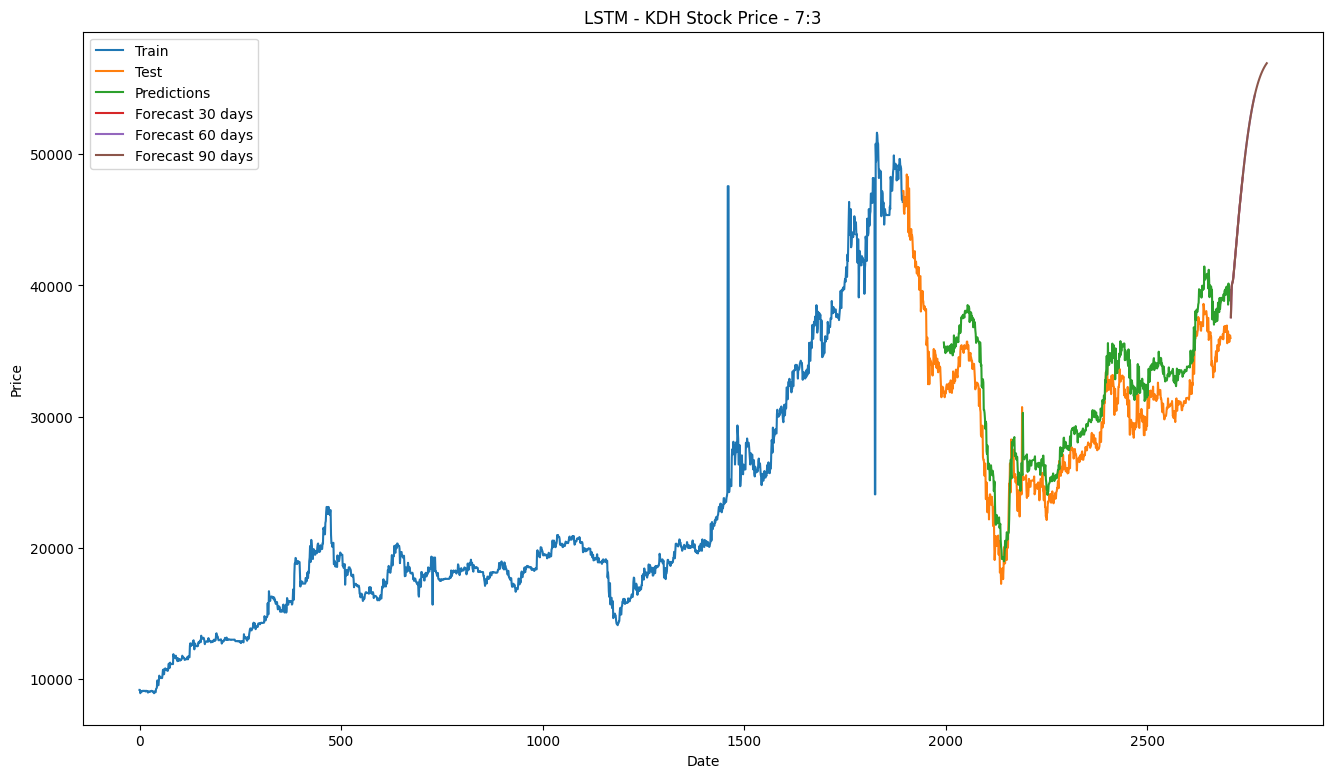

In [27]:
plt.figure(figsize =(16, 9))

train_data_index = pd.RangeIndex(start=0, stop=train_size_7_3, step=1)
plt.plot(scaler.inverse_transform(train_data_7_3))
test_data_index = pd.RangeIndex(start=train_size_7_3, stop=train_size_7_3+len(test_data_7_3), step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data_7_3))
predict_data_index = pd.RangeIndex(start=train_size_7_3 + (len(test_data_7_3) - len(y_pred_7_3)), stop=train_size_7_3+len(y_pred_7_3) + (len(test_data_7_3) - len(y_pred_7_3)), step=1)
plt.plot(predict_data_index,y_pred_7_3)
forecast_data_30_index = pd.RangeIndex(start=train_size_7_3+len(y_pred_7_3) + (len(test_data_7_3) - len(y_pred_7_3)), stop=train_size_7_3+len(y_pred_7_3) + (len(test_data_7_3) - len(y_pred_7_3)) + len(forecast_30days_7_3), step=1)
plt.plot(forecast_data_30_index,scaler.inverse_transform(np.array(forecast_30days_7_3).reshape(-1,1)))
forecast_data_60_index = pd.RangeIndex(start=train_size_7_3+len(y_pred_7_3) + (len(test_data_7_3) - len(y_pred_7_3)), stop=train_size_7_3+len(y_pred_7_3) + (len(test_data_7_3) - len(y_pred_7_3)) + len(forecast_60days_7_3), step=1)
plt.plot(forecast_data_60_index,scaler.inverse_transform(np.array(forecast_60days_7_3).reshape(-1,1)))
forecast_data_90_index = pd.RangeIndex(start=train_size_7_3+len(y_pred_7_3) + (len(test_data_7_3) - len(y_pred_7_3)), stop=train_size_7_3+len(y_pred_7_3) + (len(test_data_7_3) - len(y_pred_7_3)) + len(forecast_90days_7_3), step=1)
plt.plot(forecast_data_90_index,scaler.inverse_transform(np.array(forecast_90days_7_3).reshape(-1,1)))

plt.title('LSTM - KDH Stock Price - 7:3')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Train','Test','Predictions', 'Forecast 30 days', 'Forecast 60 days', 'Forecast 90 days'])
plt.show()

In [28]:
y_test_7_3 = y_test_7_3.reshape(-1,1)
y_test_7_3 = scaler.inverse_transform(y_test_7_3)

rmse = np.sqrt(mean_squared_error(y_test_7_3, y_pred_7_3))
print("RMSE:", rmse)
mae = mean_absolute_error(y_test_7_3, y_pred_7_3)
print("MAE:", mae)
mape = mean_absolute_percentage_error(y_test_7_3, y_pred_7_3)
print("MAPE:", mape)

RMSE: 2474.9106677556006
MAE: 2295.8782405781835
MAPE: 0.07793652045537991


## 8:2

In [29]:
model_8_2 =Sequential()
model_8_2.add(LSTM(50,return_sequences=True,input_shape=(time_step, 1)))
model_8_2.add(LSTM(50,return_sequences=True))
model_8_2.add(LSTM(50))
model_8_2.add(Dense(1))
model_8_2.compile(loss='mean_squared_error',optimizer='adam')

In [30]:
model_8_2.fit(x_train_8_2, y_train_8_2, validation_data=(x_test_8_2, y_test_8_2), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
33/33 [==============================] - 7s 61ms/step - loss: 0.0225 - val_loss: 0.0039
Epoch 2/100
33/33 [==============================] - 1s 24ms/step - loss: 0.0019 - val_loss: 8.7564e-04
Epoch 3/100
33/33 [==============================] - 1s 25ms/step - loss: 0.0017 - val_loss: 8.5235e-04
Epoch 4/100
33/33 [==============================] - 1s 24ms/step - loss: 0.0017 - val_loss: 0.0012
Epoch 5/100
33/33 [==============================] - 1s 17ms/step - loss: 0.0016 - val_loss: 7.9662e-04
Epoch 6/100
33/33 [==============================] - 1s 17ms/step - loss: 0.0017 - val_loss: 8.8692e-04
Epoch 7/100
33/33 [==============================] - 1s 17ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 8/100
33/33 [==============================] - 1s 17ms/step - loss: 0.0016 - val_loss: 7.6998e-04
Epoch 9/100
33/33 [==============================] - 1s 17ms/step - loss: 0.0016 - val_loss: 7.4284e-04
Epoch 10/100
33/33 [==============================] - 1s 17ms/step - loss: 0

In [31]:
y_pred_8_2 = model_8_2.predict(x_test_8_2)
y_pred_8_2

14/14 [==============================] - 1s 9ms/step


array([[0.3417916 ],
       [0.338158  ],
       [0.33714962],
       [0.3281406 ],
       [0.33226076],
       [0.332028  ],
       [0.3326462 ],
       [0.33918408],
       [0.33453146],
       [0.33318987],
       [0.34061095],
       [0.34334812],
       [0.348358  ],
       [0.34884378],
       [0.35783443],
       [0.35142234],
       [0.35014507],
       [0.3843417 ],
       [0.38948956],
       [0.38735315],
       [0.37954667],
       [0.37229353],
       [0.38361242],
       [0.38562652],
       [0.37929496],
       [0.38114122],
       [0.40267894],
       [0.40376067],
       [0.38570717],
       [0.39105842],
       [0.39149898],
       [0.39492625],
       [0.392223  ],
       [0.38341364],
       [0.38257873],
       [0.38137546],
       [0.38580024],
       [0.38606387],
       [0.37890697],
       [0.37947324],
       [0.37839255],
       [0.38518307],
       [0.40254244],
       [0.38685578],
       [0.38551858],
       [0.411263  ],
       [0.41416088],
       [0.414

In [32]:
y_pred_8_2 = scaler.inverse_transform(y_pred_8_2.reshape(-1,1))
y_pred_8_2

array([[23536.295],
       [23381.17 ],
       [23338.121],
       [22953.516],
       [23129.412],
       [23119.475],
       [23145.865],
       [23424.977],
       [23226.35 ],
       [23169.076],
       [23485.89 ],
       [23602.744],
       [23816.621],
       [23837.361],
       [24221.182],
       [23947.441],
       [23892.914],
       [25352.809],
       [25572.578],
       [25481.371],
       [25148.104],
       [24838.457],
       [25321.676],
       [25407.66 ],
       [25137.357],
       [25216.176],
       [26135.648],
       [26181.826],
       [25411.104],
       [25639.553],
       [25658.361],
       [25804.676],
       [25689.27 ],
       [25313.19 ],
       [25277.545],
       [25226.178],
       [25415.074],
       [25426.33 ],
       [25120.793],
       [25144.969],
       [25098.832],
       [25388.729],
       [26129.82 ],
       [25460.137],
       [25403.05 ],
       [26502.11 ],
       [26625.826],
       [26649.732],
       [26754.139],
       [26609.088],


In [33]:
#Forecast 30 days
forecast_30days_8_2 = forecast_future_days(model_8_2, test_data_8_2, 30)
#Forecast 60 days
forecast_60days_8_2 = forecast_future_days(model_8_2, test_data_8_2, 60)
#Forecast 90 days
forecast_90days_8_2 = forecast_future_days(model_8_2, test_data_8_2, 90)

[0.6188548]
21
1 day input [0.63139945 0.64311146 0.65248107 0.65482348 0.6445169  0.6445169
 0.65482348 0.64545386 0.64779627 0.65599468 0.62437224 0.6456881
 0.6456881  0.62905704 0.63959786 0.62671464 0.63491305 0.63842665
 0.63374185 0.61885482]
1 day output [[0.60585594]]
2 day input [0.64311146 0.65248107 0.65482348 0.6445169  0.6445169  0.65482348
 0.64545386 0.64779627 0.65599468 0.62437224 0.6456881  0.6456881
 0.62905704 0.63959786 0.62671464 0.63491305 0.63842665 0.63374185
 0.61885482 0.60585594]
2 day output [[0.59874976]]
3 day input [0.65248107 0.65482348 0.6445169  0.6445169  0.65482348 0.64545386
 0.64779627 0.65599468 0.62437224 0.6456881  0.6456881  0.62905704
 0.63959786 0.62671464 0.63491305 0.63842665 0.63374185 0.61885482
 0.60585594 0.59874976]
3 day output [[0.5939317]]
4 day input [0.65482348 0.6445169  0.6445169  0.65482348 0.64545386 0.64779627
 0.65599468 0.62437224 0.6456881  0.6456881  0.62905704 0.63959786
 0.62671464 0.63491305 0.63842665 0.63374185 0.6

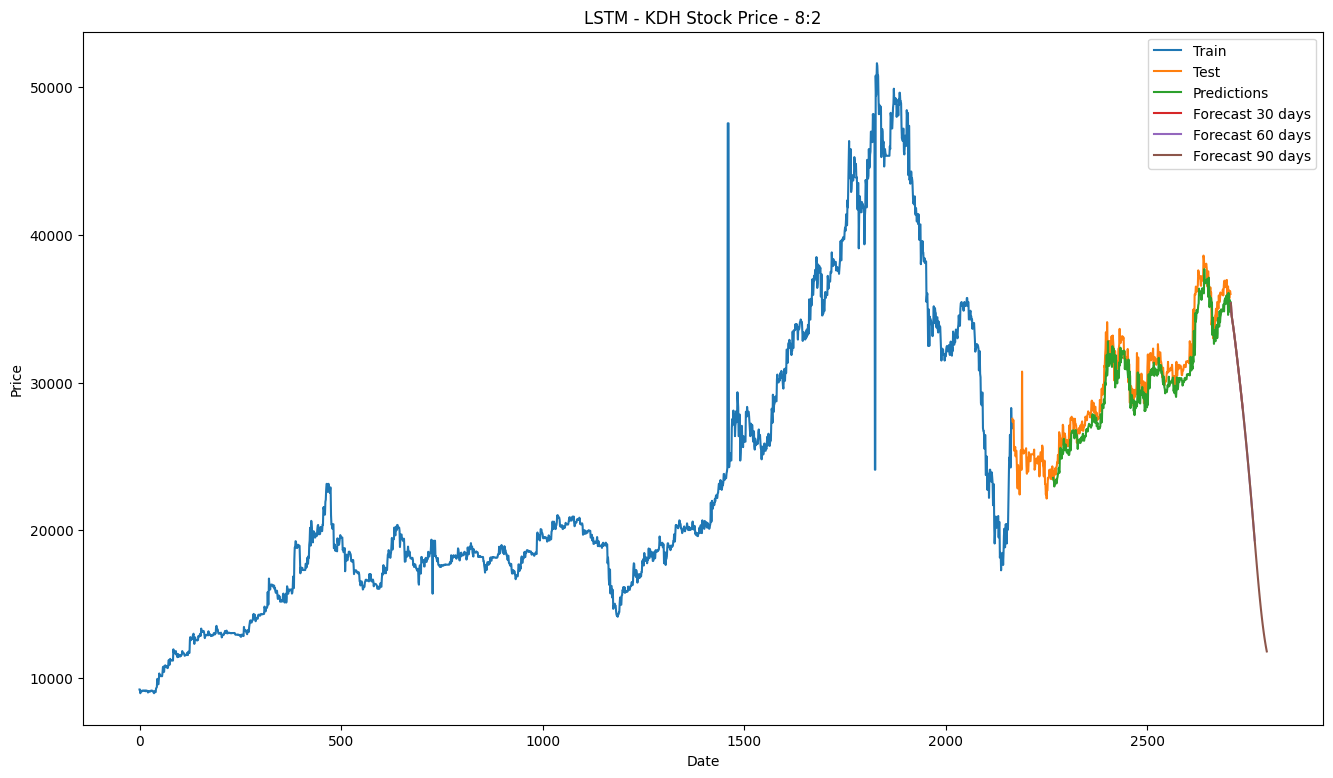

In [34]:
plt.figure(figsize =(16, 9))

train_data_index = pd.RangeIndex(start=0, stop=train_size_8_2, step=1)
plt.plot(scaler.inverse_transform(train_data_8_2))
test_data_index = pd.RangeIndex(start=train_size_8_2, stop=train_size_8_2+len(test_data_8_2), step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data_8_2))
predict_data_index = pd.RangeIndex(start=train_size_8_2 + (len(test_data_8_2) - len(y_pred_8_2)), stop=train_size_8_2+len(y_pred_8_2) + (len(test_data_8_2) - len(y_pred_8_2)), step=1)
plt.plot(predict_data_index,y_pred_8_2)
forecast_data_30_index = pd.RangeIndex(start=train_size_8_2+len(y_pred_8_2) + (len(test_data_8_2) - len(y_pred_8_2)), stop=train_size_8_2+len(y_pred_8_2) + (len(test_data_8_2) - len(y_pred_8_2)) + len(forecast_30days_8_2), step=1)
plt.plot(forecast_data_30_index,scaler.inverse_transform(np.array(forecast_30days_8_2).reshape(-1,1)))
forecast_data_60_index = pd.RangeIndex(start=train_size_8_2+len(y_pred_8_2) + (len(test_data_8_2) - len(y_pred_8_2)), stop=train_size_8_2+len(y_pred_8_2) + (len(test_data_8_2) - len(y_pred_8_2)) + len(forecast_60days_8_2), step=1)
plt.plot(forecast_data_60_index,scaler.inverse_transform(np.array(forecast_60days_8_2).reshape(-1,1)))
forecast_data_90_index = pd.RangeIndex(start=train_size_8_2+len(y_pred_8_2) + (len(test_data_8_2) - len(y_pred_8_2)), stop=train_size_8_2+len(y_pred_8_2) + (len(test_data_8_2) - len(y_pred_8_2)) + len(forecast_90days_8_2), step=1)
plt.plot(forecast_data_90_index,scaler.inverse_transform(np.array(forecast_90days_8_2).reshape(-1,1)))

plt.title('LSTM - KDH Stock Price - 8:2')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Train','Test','Predictions', 'Forecast 30 days', 'Forecast 60 days', 'Forecast 90 days'])
plt.show()

In [35]:
y_test_8_2 = y_test_8_2.reshape(-1,1)
y_test_8_2 = scaler.inverse_transform(y_test_8_2)

rmse = np.sqrt(mean_squared_error(y_test_8_2, y_pred_8_2))
print("RMSE:", rmse)
mae = mean_absolute_error(y_test_8_2, y_pred_8_2)
print("MAE:", mae)
mape = mean_absolute_percentage_error(y_test_8_2, y_pred_8_2)
print("MAPE:", mape)

RMSE: 1066.1758935945716
MAE: 916.1077540391157
MAPE: 0.029420661794177485


## 9:1

In [36]:
model_9_1 =Sequential()
model_9_1.add(LSTM(50,return_sequences=True,input_shape=(time_step, 1)))
model_9_1.add(LSTM(50,return_sequences=True))
model_9_1.add(LSTM(50))
model_9_1.add(Dense(1))
model_9_1.compile(loss='mean_squared_error',optimizer='adam')

In [37]:
model_9_1.fit(x_train_9_1, y_train_9_1, validation_data=(x_test_9_1, y_test_9_1), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
37/37 [==============================] - 9s 48ms/step - loss: 0.0208 - val_loss: 0.0058
Epoch 2/100
37/37 [==============================] - 1s 17ms/step - loss: 0.0021 - val_loss: 0.0012
Epoch 3/100
37/37 [==============================] - 1s 17ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 4/100
37/37 [==============================] - 1s 16ms/step - loss: 0.0016 - val_loss: 0.0010
Epoch 5/100
37/37 [==============================] - 1s 17ms/step - loss: 0.0016 - val_loss: 0.0010
Epoch 6/100
37/37 [==============================] - 1s 17ms/step - loss: 0.0016 - val_loss: 9.5048e-04
Epoch 7/100
37/37 [==============================] - 1s 16ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 8/100
37/37 [==============================] - 1s 27ms/step - loss: 0.0015 - val_loss: 9.1332e-04
Epoch 9/100
37/37 [==============================] - 1s 35ms/step - loss: 0.0015 - val_loss: 8.9003e-04
Epoch 10/100
37/37 [==============================] - 1s 37ms/step - loss: 0.0014 - val_

In [38]:
y_pred_9_1 = model_9_1.predict(x_test_9_1)
y_pred_9_1

6/6 [==============================] - 1s 9ms/step


array([[0.52513903],
       [0.51461613],
       [0.5097395 ],
       [0.5219163 ],
       [0.518659  ],
       [0.50488234],
       [0.50242203],
       [0.49542698],
       [0.49994776],
       [0.49799845],
       [0.497629  ],
       [0.4968482 ],
       [0.50095516],
       [0.5078321 ],
       [0.50593966],
       [0.506411  ],
       [0.52136767],
       [0.5065974 ],
       [0.50957376],
       [0.5126324 ],
       [0.51141185],
       [0.5109746 ],
       [0.5142427 ],
       [0.51493245],
       [0.5131387 ],
       [0.5137123 ],
       [0.519767  ],
       [0.51010245],
       [0.4981593 ],
       [0.5036255 ],
       [0.49509397],
       [0.50598323],
       [0.5038528 ],
       [0.49258682],
       [0.48881066],
       [0.49895024],
       [0.5196267 ],
       [0.5193235 ],
       [0.50131613],
       [0.5048244 ],
       [0.51896566],
       [0.51420933],
       [0.51258343],
       [0.5192896 ],
       [0.5175967 ],
       [0.51739174],
       [0.5178962 ],
       [0.519

In [39]:
y_pred_9_1 = scaler.inverse_transform(y_pred_9_1.reshape(-1,1))
y_pred_9_1

array([[31363.615],
       [30914.379],
       [30706.191],
       [31226.031],
       [31086.975],
       [30498.832],
       [30393.799],
       [30095.174],
       [30288.17 ],
       [30204.951],
       [30189.178],
       [30155.846],
       [30331.176],
       [30624.762],
       [30543.97 ],
       [30564.094],
       [31202.611],
       [30572.05 ],
       [30699.115],
       [30829.693],
       [30777.584],
       [30758.918],
       [30898.438],
       [30927.883],
       [30851.307],
       [30875.793],
       [31134.275],
       [30721.686],
       [30211.816],
       [30445.178],
       [30080.957],
       [30545.83 ],
       [30454.879],
       [29973.924],
       [29812.713],
       [30245.584],
       [31128.285],
       [31115.344],
       [30346.586],
       [30496.36 ],
       [31100.066],
       [30897.014],
       [30827.602],
       [31113.896],
       [31041.625],
       [31032.873],
       [31054.408],
       [31107.705],
       [30984.664],
       [30931.275],


In [40]:
#Forecast 30 days
forecast_30days_9_1 = forecast_future_days(model_9_1, test_data_9_1, 30)
#Forecast 60 days
forecast_60days_9_1 = forecast_future_days(model_9_1, test_data_9_1, 60)
#Forecast 90 days
forecast_90days_9_1 = forecast_future_days(model_9_1, test_data_9_1, 90)

[0.6383406]
21
1 day input [0.63139945 0.64311146 0.65248107 0.65482348 0.6445169  0.6445169
 0.65482348 0.64545386 0.64779627 0.65599468 0.62437224 0.6456881
 0.6456881  0.62905704 0.63959786 0.62671464 0.63491305 0.63842665
 0.63374185 0.63834059]
1 day output [[0.64449334]]
2 day input [0.64311146 0.65248107 0.65482348 0.6445169  0.6445169  0.65482348
 0.64545386 0.64779627 0.65599468 0.62437224 0.6456881  0.6456881
 0.62905704 0.63959786 0.62671464 0.63491305 0.63842665 0.63374185
 0.63834059 0.64449334]
2 day output [[0.64752555]]
3 day input [0.65248107 0.65482348 0.6445169  0.6445169  0.65482348 0.64545386
 0.64779627 0.65599468 0.62437224 0.6456881  0.6456881  0.62905704
 0.63959786 0.62671464 0.63491305 0.63842665 0.63374185 0.63834059
 0.64449334 0.64752555]
3 day output [[0.6487457]]
4 day input [0.65482348 0.6445169  0.6445169  0.65482348 0.64545386 0.64779627
 0.65599468 0.62437224 0.6456881  0.6456881  0.62905704 0.63959786
 0.62671464 0.63491305 0.63842665 0.63374185 0.6

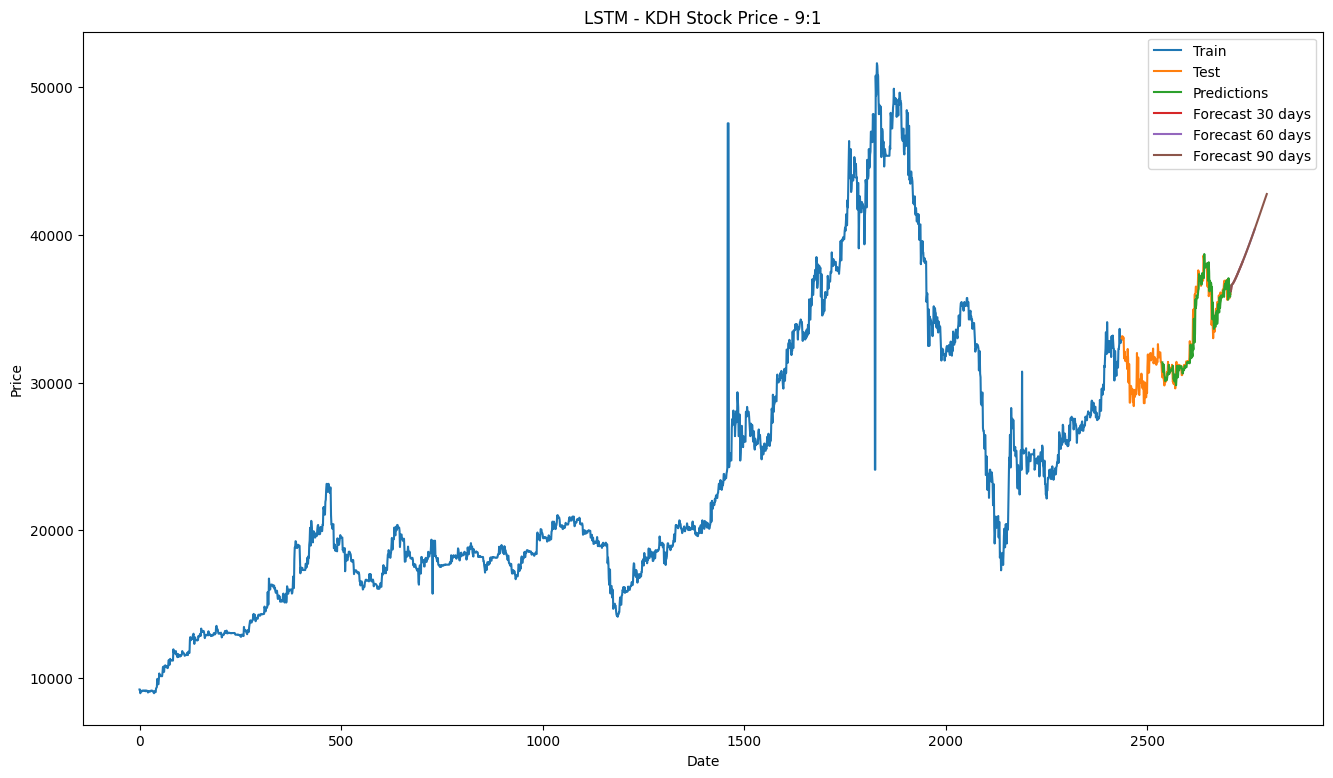

In [41]:
plt.figure(figsize =(16, 9))

train_data_index = pd.RangeIndex(start=0, stop=train_size_9_1, step=1)
plt.plot(scaler.inverse_transform(train_data_9_1))
test_data_index = pd.RangeIndex(start=train_size_9_1, stop=train_size_9_1+len(test_data_9_1), step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data_9_1))
predict_data_index = pd.RangeIndex(start=train_size_9_1 + (len(test_data_9_1) - len(y_pred_9_1)), stop=train_size_9_1+len(y_pred_9_1) + (len(test_data_9_1) - len(y_pred_9_1)), step=1)
plt.plot(predict_data_index,y_pred_9_1)
forecast_data_30_index = pd.RangeIndex(start=train_size_9_1+len(y_pred_9_1) + (len(test_data_9_1) - len(y_pred_9_1)), stop=train_size_9_1+len(y_pred_9_1) + (len(test_data_9_1) - len(y_pred_9_1)) + len(forecast_30days_9_1), step=1)
plt.plot(forecast_data_30_index,scaler.inverse_transform(np.array(forecast_30days_9_1).reshape(-1,1)))
forecast_data_60_index = pd.RangeIndex(start=train_size_9_1+len(y_pred_9_1) + (len(test_data_9_1) - len(y_pred_9_1)), stop=train_size_9_1+len(y_pred_9_1) + (len(test_data_9_1) - len(y_pred_9_1)) + len(forecast_60days_9_1), step=1)
plt.plot(forecast_data_60_index,scaler.inverse_transform(np.array(forecast_60days_9_1).reshape(-1,1)))
forecast_data_90_index = pd.RangeIndex(start=train_size_9_1+len(y_pred_9_1) + (len(test_data_9_1) - len(y_pred_9_1)), stop=train_size_9_1+len(y_pred_9_1) + (len(test_data_9_1) - len(y_pred_9_1)) + len(forecast_90days_9_1), step=1)
plt.plot(forecast_data_90_index,scaler.inverse_transform(np.array(forecast_90days_9_1).reshape(-1,1)))

plt.title('LSTM - KDH Stock Price - 9:1')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Train','Test','Predictions', 'Forecast 30 days', 'Forecast 60 days', 'Forecast 90 days'])
plt.show()

In [42]:
y_test_9_1 = y_test_9_1.reshape(-1,1)
y_test_9_1 = scaler.inverse_transform(y_test_9_1)

rmse = np.sqrt(mean_squared_error(y_test_9_1, y_pred_9_1))
print("RMSE:", rmse)
mae = mean_absolute_error(y_test_9_1, y_pred_9_1)
print("MAE:", mae)
mape = mean_absolute_percentage_error(y_test_9_1, y_pred_9_1)
print("MAPE:", mape)

RMSE: 607.9493139268143
MAE: 409.01047794117636
MAPE: 0.011976055951833885
